![](https://www.miskawaanhealth.com/wp-content/uploads/2021/05/chronic-kidney-disease-stages.jpg)

In [54]:
# import necessary libraries like numpy, pandas, pyplot and seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [55]:
# reading dataset
chronic_df = pd.read_csv('/content/kidney_disease.csv')
chronic_df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


## **`Dataset Description`**
- age		-	age
- bp		-	blood pressure
- sg		-	specific gravity
- al		-   	albumin
- su		-	sugar
- rbc		-	red blood cells
- pc		-	pus cell
- pcc		-	pus cell clumps
- ba		-	bacteria
- 	bgr		-	blood glucose random
-			bu		-	blood urea
-			sc		-	serum creatinine
-			sod		-	sodium
-			pot		-	potassium
-			hemo		-	hemoglobin
-			pcv		-	packed cell volume
-			wc		-	white blood cell count
-			rc		-	red blood cell count
-			htn		-	hypertension
-			dm		-	diabetes mellitus
-			cad		-	coronary artery disease
-			appet		-	appetite
-			pe		-	pedal edema
-			ane		-	anemia
-			class		-	class
- ##################################################
%
- Number of Attributes: 24 + class = 25 ( 11  numeric ,14  nominal)
%
<h3>Attribute Information :</h3>
- 1.Age(numerical)
  	  	age in years
- 	2.Blood Pressure(numerical)
	       	bp in mm/Hg
-	3.Specific Gravity(nominal)
	  	sg - (1.005,1.010,1.015,1.020,1.025)
- 	4.Albumin(nominal)
		  al - (0,1,2,3,4,5)
-	5.Sugar(nominal)
		  su - (0,1,2,3,4,5)
- 	6.Red Blood Cells(nominal)
		  rbc - (normal,abnormal)
- 	7.Pus Cell (nominal)
		  pc - (normal,abnormal)
- 	8.Pus Cell clumps(nominal)
		  pcc - (present,notpresent)
- 	9.Bacteria(nominal)
		  ba  - (present,notpresent)
- 	10.Blood Glucose Random(numerical)
		  bgr in mgs/dl
- 	11.Blood Urea(numerical)
		  bu in mgs/dl
- 	12.Serum Creatinine(numerical)
		  sc in mgs/dl
- 	13.Sodium(numerical)
		  sod in mEq/L
- 	14.Potassium(numerical)
		  pot in mEq/L
- 	15.Hemoglobin(numerical)
		  hemo in gms
- 	16.Packed  Cell Volume(numerical)
- 	17.White Blood Cell Count(numerical)
		  wc in cells/cumm
- 	18.Red Blood Cell Count(numerical)
		  rc in millions/cmm
- 	19.Hypertension(nominal)
		  htn - (yes,no)
- 	20.Diabetes Mellitus(nominal)
		  dm - (yes,no)
- 	21.Coronary Artery Disease(nominal)
		  cad - (yes,no)
- 	22.Appetite(nominal)
	    appet - (good,poor)
- 	23.Pedal Edema(nominal)
		  pe - (yes,no)
- 	24.Anemia(nominal)
		  ane - (yes,no)
- 	25.Class (nominal)
		  class - (ckd,notckd)

In [56]:
# checking info of columns and null values
chronic_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

## **`Data Cleaning`**

In [57]:
# drop id column
chronic_df =chronic_df.drop('id', axis = 1)



In [58]:
# rename column names to make it more user-friendly

chronic_df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [59]:
chronic_df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


### According to the data description
- Cols(pcv, wc and rc) needs to convert back in numerical since it is object right now
- Cols(sg, al and su) should be nominal , convert from float to object

In [60]:
# Categorical cols like specific_gravity, albumin and sugar which is float type right now
# converting back to nominal data type categorical
chronic_df['specific_gravity'] = chronic_df['specific_gravity'].astype('object')
chronic_df['albumin'] = chronic_df['albumin'].astype('object')
chronic_df['sugar'] = chronic_df['sugar'].astype('object')



In [61]:
# converting necessary columns like packed_cell_volume, white-blood_cell_count and red_blood_cell_count
# currently it is in object type and converting back to numerical type
chronic_df['packed_cell_volume'] = pd.to_numeric(chronic_df['packed_cell_volume'], errors='coerce')
chronic_df['white_blood_cell_count'] = pd.to_numeric(chronic_df['white_blood_cell_count'], errors='coerce')
chronic_df['red_blood_cell_count'] = pd.to_numeric(chronic_df['red_blood_cell_count'], errors='coerce')



In [62]:
chronic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    object 
 3   albumin                  354 non-null    object 
 4   sugar                    351 non-null    object 
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [63]:
# Extracting categorical and numerical columns

cat_cols =[col for col in chronic_df.columns if chronic_df[col].dtypes == 'object']
num_cols =[col for col in chronic_df.columns if chronic_df[col].dtypes !='object']


In [64]:
cat_cols


['specific_gravity',
 'albumin',
 'sugar',
 'red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'aanemia',
 'class']

In [65]:
# by looping & looking at unique values in categorical columns

for col in cat_cols:
  print(f"{col} has {chronic_df[col].unique()}values\n")

#specific_gravity has [1.02 1.01 1.005 1.015 nan 1.025] values

specific_gravity has [1.02 1.01 1.005 1.015 nan 1.025]values

albumin has [1.0 4.0 2.0 3.0 0.0 nan 5.0]values

sugar has [0.0 3.0 4.0 1.0 nan 2.0 5.0]values

red_blood_cells has [nan 'normal' 'abnormal']values

pus_cell has ['normal' 'abnormal' nan]values

pus_cell_clumps has ['notpresent' 'present' nan]values

bacteria has ['notpresent' 'present' nan]values

hypertension has ['yes' 'no' nan]values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan]values

coronary_artery_disease has ['no' 'yes' '\tno' nan]values

appetite has ['good' 'poor' nan]values

peda_edema has ['no' 'yes' nan]values

aanemia has ['no' 'yes' nan]values

class has ['ckd' 'ckd\t' 'notckd']values



In [66]:
# replace incorrect values like '\tno', '\tyes', ' yes', '\tno', 'ckd\t', 'notckd'  in categorical cols
chronic_df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)
chronic_df['coronary_artery_disease'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)
chronic_df['class'].replace(to_replace = {'ckd\t':'ckd','notckd\t':'notckd'},inplace=True)



In [67]:
for col in cat_cols:
  print(f"{col} has {chronic_df[col].unique()}values\n")

specific_gravity has [1.02 1.01 1.005 1.015 nan 1.025]values

albumin has [1.0 4.0 2.0 3.0 0.0 nan 5.0]values

sugar has [0.0 3.0 4.0 1.0 nan 2.0 5.0]values

red_blood_cells has [nan 'normal' 'abnormal']values

pus_cell has ['normal' 'abnormal' nan]values

pus_cell_clumps has ['notpresent' 'present' nan]values

bacteria has ['notpresent' 'present' nan]values

hypertension has ['yes' 'no' nan]values

diabetes_mellitus has ['yes' 'no' nan]values

coronary_artery_disease has ['no' 'yes' nan]values

appetite has ['good' 'poor' nan]values

peda_edema has ['no' 'yes' nan]values

aanemia has ['no' 'yes' nan]values

class has ['ckd' 'notckd']values



In [68]:
# Converting target col class into 0(chronic kidney) and 1(not a chronic kidney)
chronic_df['class'].replace(to_replace = {'ckd':0,'notckd':1},inplace=True)


# coverting target col into numeric to check correlation
chronic_df['class'] = pd.to_numeric(chronic_df['class'], errors='coerce')



In [69]:
for col in cat_cols:
  print(f"{col} has {chronic_df[col].unique()}values\n")


specific_gravity has [1.02 1.01 1.005 1.015 nan 1.025]values

albumin has [1.0 4.0 2.0 3.0 0.0 nan 5.0]values

sugar has [0.0 3.0 4.0 1.0 nan 2.0 5.0]values

red_blood_cells has [nan 'normal' 'abnormal']values

pus_cell has ['normal' 'abnormal' nan]values

pus_cell_clumps has ['notpresent' 'present' nan]values

bacteria has ['notpresent' 'present' nan]values

hypertension has ['yes' 'no' nan]values

diabetes_mellitus has ['yes' 'no' nan]values

coronary_artery_disease has ['no' 'yes' nan]values

appetite has ['good' 'poor' nan]values

peda_edema has ['no' 'yes' nan]values

aanemia has ['no' 'yes' nan]values

class has [0 1]values



In [70]:
# let's see the cols in numerical col list
for col in num_cols:
  print(f"{col}")


age
blood_pressure
blood_glucose_random
blood_urea
serum_creatinine
sodium
potassium
haemoglobin
packed_cell_volume
white_blood_cell_count
red_blood_cell_count


## **`EDA`**

<Figure size 2000x1200 with 0 Axes>

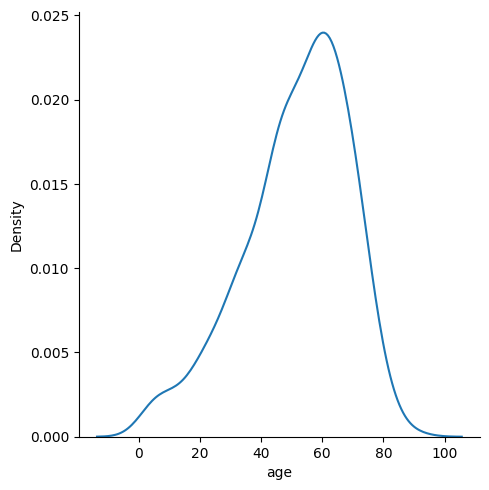

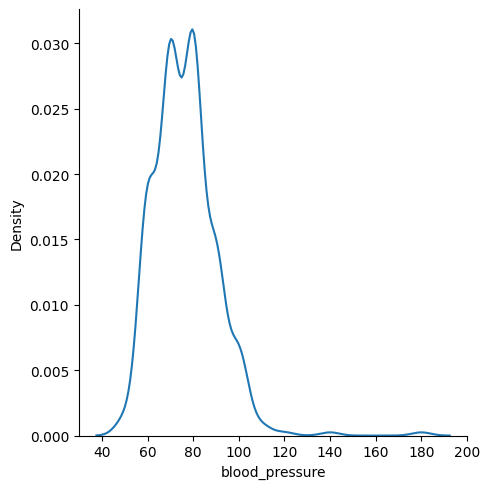

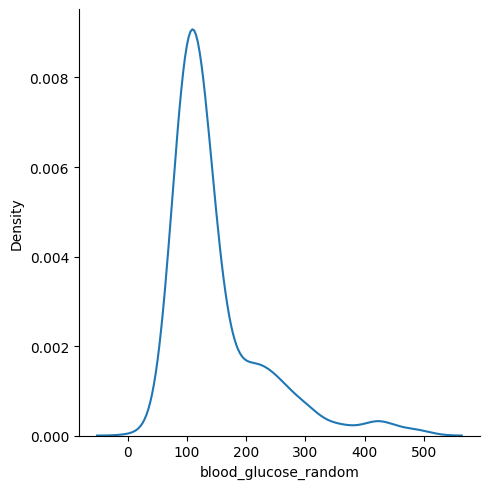

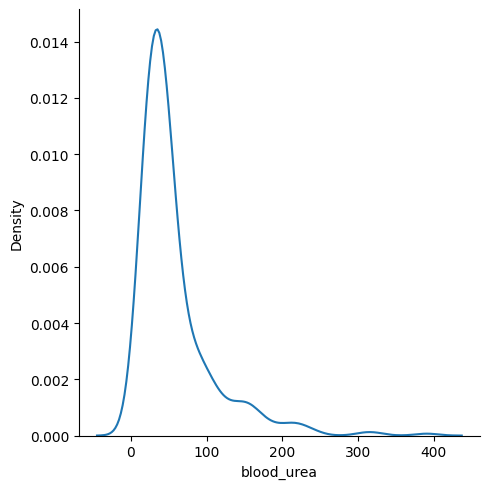

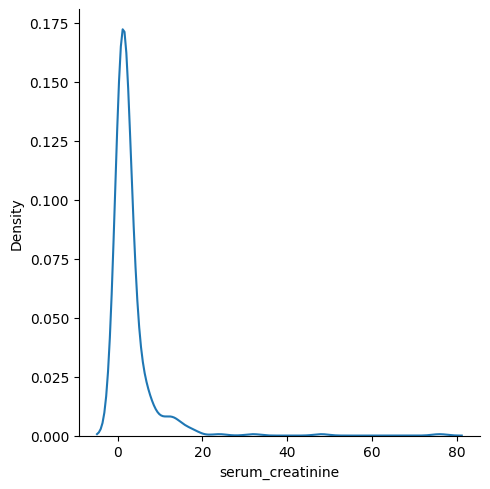

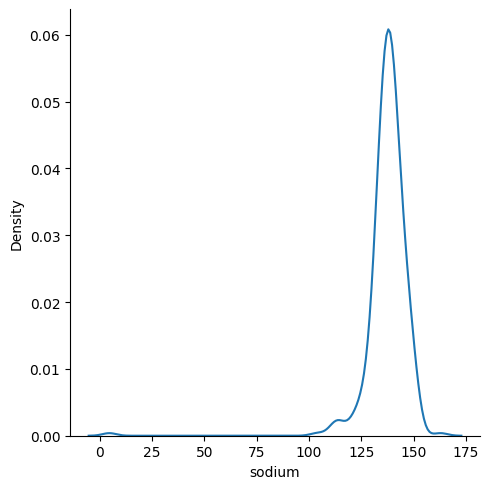

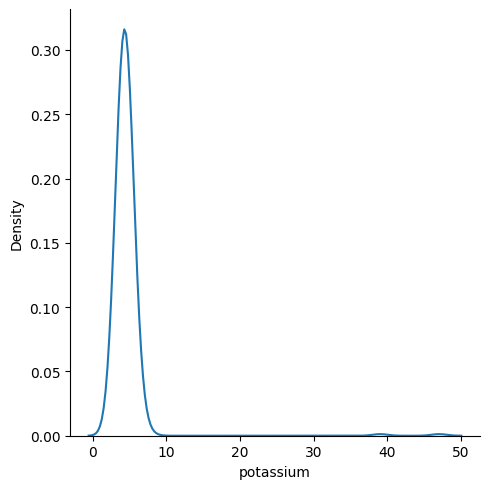

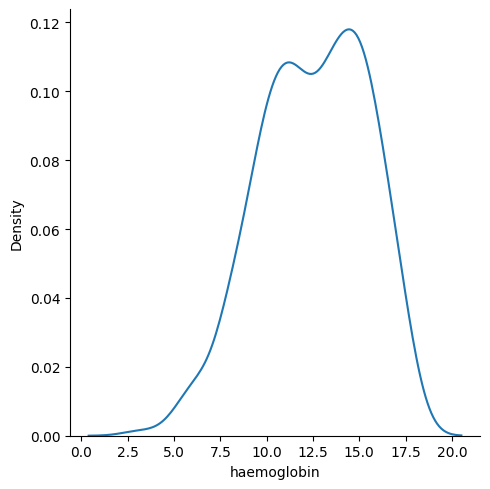

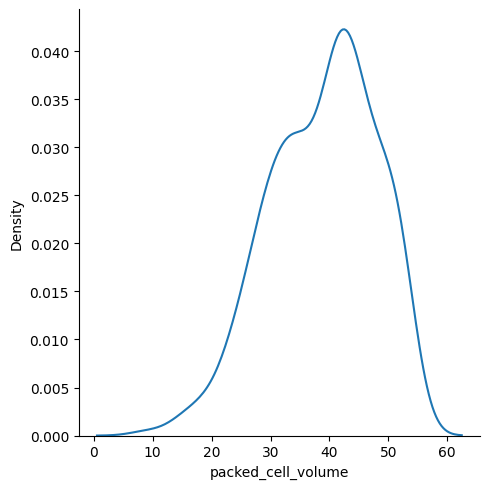

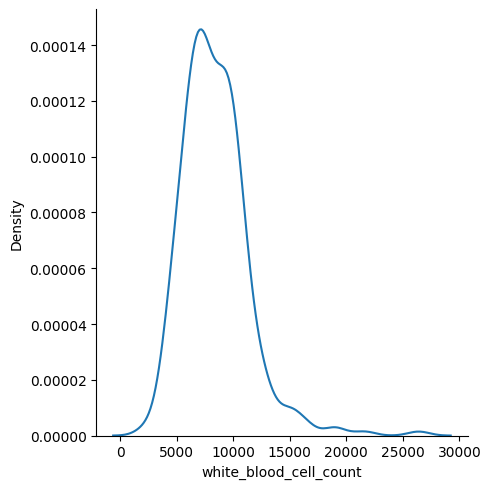

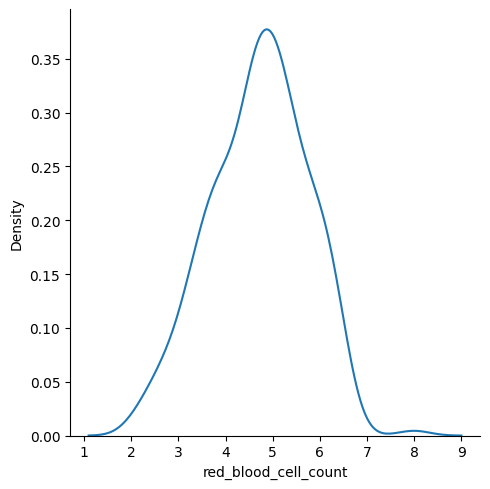

In [71]:
# checking numerical features distribution


plt.figure(figsize=(20,12))

# looping over num cols and checking its distribution
for col in num_cols:
 sns.displot(chronic_df[col],kind='kde')





In [72]:
# let's see the cols in cat col list
for col in cat_cols:
  print(f"{col}")



specific_gravity
albumin
sugar
red_blood_cells
pus_cell
pus_cell_clumps
bacteria
hypertension
diabetes_mellitus
coronary_artery_disease
appetite
peda_edema
aanemia
class


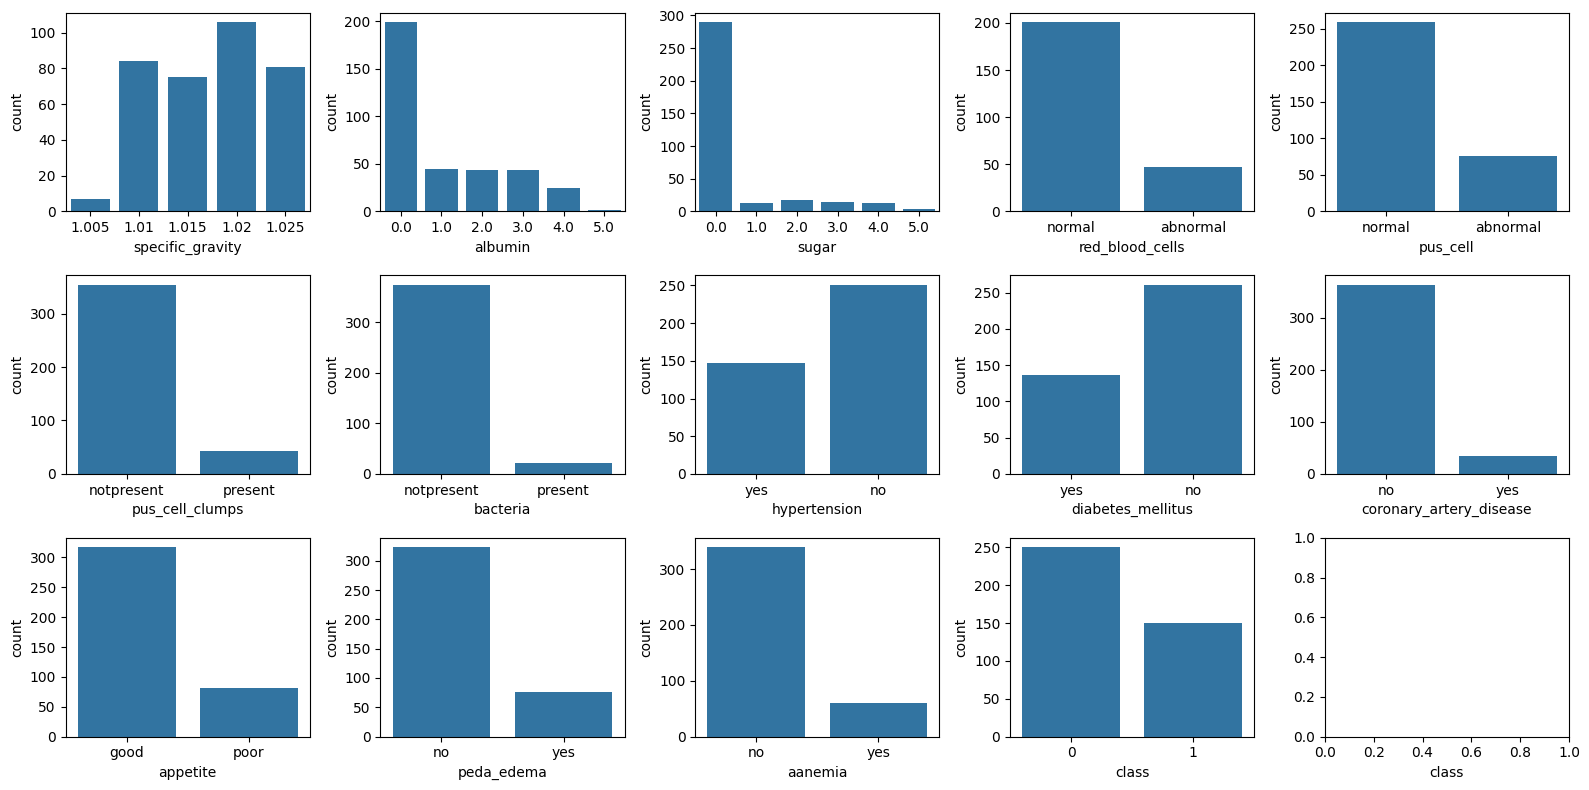

In [77]:
# checking cat features distribution

# create the figure and axes

fig, axes = plt.subplots(3, 5, figsize=(16,8))


axes = axes.ravel()  # flattening the array makes indexing easier

# loop over cat cols and plot countplot
for col,ax in zip(cat_cols,axes):
    sns.countplot(data=chronic_df, x=col, ax=ax)
    plt.xlabel(col)
    fig.tight_layout()







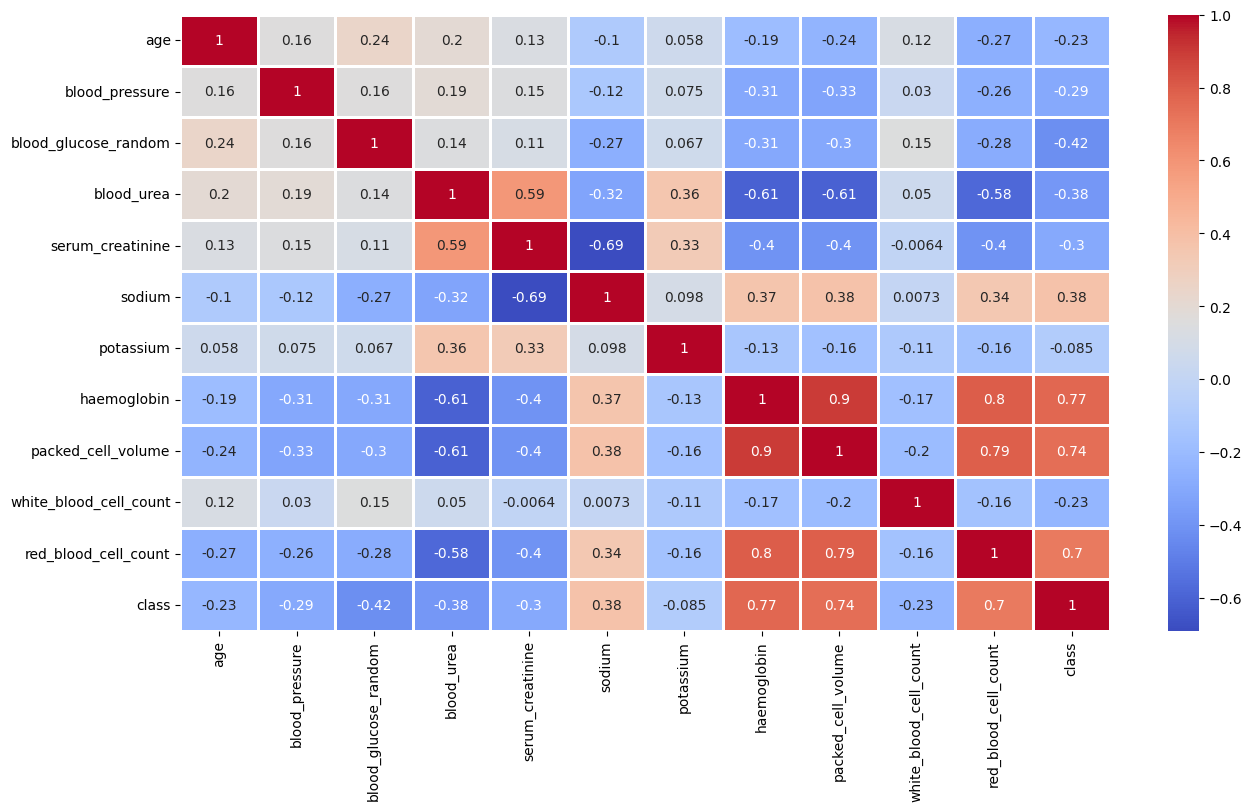

In [83]:
# correlated heatmap of data
numerical_df = chronic_df.select_dtypes(include=['int','float'])

plt.figure(figsize = (15, 8))
sns.heatmap(numerical_df.corr(), annot = True, cmap = 'coolwarm',linewidths=2)
plt.show()





In [86]:
# let's check count of null values in whole df

chronic_df.isnull().sum().sort_values(ascending = False)



,0
red_blood_cells,152
red_blood_cell_count,131
white_blood_cell_count,106
potassium,88
sodium,87
packed_cell_volume,71
pus_cell,65
haemoglobin,52
sugar,49
specific_gravity,47


In [87]:
# let's check count of null values in num_cols
chronic_df[num_cols].isnull().sum().sort_values(ascending = False)



,0
red_blood_cell_count,131
white_blood_cell_count,106
potassium,88
sodium,87
packed_cell_volume,71
haemoglobin,52
blood_glucose_random,44
blood_urea,19
serum_creatinine,17
blood_pressure,12


In [88]:
# let's check count of null values in cat cols
chronic_df[cat_cols].isnull().sum().sort_values(ascending = False)




,0
red_blood_cells,152
pus_cell,65
sugar,49
specific_gravity,47
albumin,46
pus_cell_clumps,4
bacteria,4
hypertension,2
diabetes_mellitus,2
coronary_artery_disease,2


## **`Missing Value Treatment`**

In [89]:
# filling null values, we will use two methods, random sampling for higher null values and
# mean/mode sampling for lower null values

# creating func for imputing random values
def random_value_imputation(feature):
    random_sample =chronic_df[feature].dropna().sample(chronic_df[feature].isnull().sum())
    random_sample.index =chronic_df[chronic_df[feature].isnull()].index
    chronic_df.loc[chronic_df[feature].isnull(), feature] =random_sample

# creating func for imputing most common value(modal value)
def impute_mode(feature):
    mode = chronic_df[feature].mode()[0]
    chronic_df[feature] = chronic_df[feature].fillna(mode)

In [90]:
# filling num_cols null values using random sampling method
for col in num_cols:
    random_value_imputation(col)




In [91]:
# let's check count of null values in num_cols again
chronic_df[num_cols].isnull().sum().sort_values(ascending = False)




,0
age,0
blood_pressure,0
blood_glucose_random,0
blood_urea,0
serum_creatinine,0
sodium,0
potassium,0
haemoglobin,0
packed_cell_volume,0
white_blood_cell_count,0


In [93]:
# filling "red_blood_cells" and "pus_cell" using random sampling method and rest of cat_cols using mode imputation
random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')


for col in cat_cols:
    impute_mode(col)




In [94]:
# let's check count of null values in cat_cols again
chronic_df[cat_cols].isnull().sum().sort_values(ascending = False)


,0
specific_gravity,0
albumin,0
sugar,0
red_blood_cells,0
pus_cell,0
pus_cell_clumps,0
bacteria,0
hypertension,0
diabetes_mellitus,0
coronary_artery_disease,0


In [97]:
# check unique values in each cat col by looping over cat cols
for col in cat_cols:
  print(f"{col} has {chronic_df[col].nunique()}values\n")






specific_gravity has 5values

albumin has 6values

sugar has 6values

red_blood_cells has 2values

pus_cell has 2values

pus_cell_clumps has 2values

bacteria has 2values

hypertension has 2values

diabetes_mellitus has 2values

coronary_artery_disease has 2values

appetite has 2values

peda_edema has 2values

aanemia has 2values

class has 2values



In [98]:
chronic_df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,0
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,86.0,...,38.0,6000.0,2.1,no,no,no,good,no,no,0
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,3.4,no,yes,no,poor,no,yes,0
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,0
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,0


In [99]:
# using labelencoder and applying on cat cols
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols[3:]:
    chronic_df[col] =le.fit_transform(chronic_df[col])

In [100]:
# check chronic df after transforming cat cols
chronic_df.head()




,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,86.0,...,38.0,6000.0,2.1,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,3.4,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0


In [101]:
# Split data into features and target variables (X and y)
X =chronic_df.drop('class', axis = 1)
y = chronic_df['class']




In [102]:
# splitting data intp training and test set, so import train_test_split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.2, random_state = 42)


## **`Model Building`**

In [124]:
# import KNeighborsClassifier, accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

y_train_pred=knn.predict(X_train)





# accuracy score, confusion matrix and classification report of knn
knn_acc = accuracy_score(y_test, y_pred)
print(f" Train Accuracy Score: {accuracy_score(y_train,y_train_pred)}")
print(f" Test Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f" Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
print(f" Classification Report: \n{classification_report(y_test, y_pred)}")









 Train Accuracy Score: 0.803125
 Test Accuracy Score: 0.75
 Confusion Matrix: 
[[36 16]
 [ 4 24]]
 Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.69      0.78        52
           1       0.60      0.86      0.71        28

    accuracy                           0.75        80
   macro avg       0.75      0.77      0.74        80
weighted avg       0.80      0.75      0.76        80



In [105]:
# import DecisionTreeClassifer
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

y_train_pred=dtc.predict(X_train)




# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, y_pred)
print(f" Train Accuracy Score: {accuracy_score(y_train,y_train_pred)}")
print(f" Test Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f" Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
print(f" Classification Report: \n{classification_report(y_test, y_pred)}")






 Train Accuracy Score: 1.0
 Test Accuracy Score: 0.975
 Confusion Matrix: 
[[50  2]
 [ 0 28]]
 Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        52
           1       0.93      1.00      0.97        28

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



In [106]:
# hyper parameter tuning of decision tree , import GridSearchCV

from sklearn.model_selection import GridSearchCV

"""
Use this param
 {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_samples_split' : [1, 2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}

"""

grid_param ={
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_samples_split' : [1, 2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}


# Apply gridsearchcv with cv = 5, n_jobs = -1, verbose = 1
grid_search_dtc = GridSearchCV(estimator = dtc, param_grid = grid_param, cv = 5, n_jobs = -1, verbose = 1)
grid_search_dtc.fit(X_train, y_train)






Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [108]:
# print best parameters and best score in grid search dtc
print("grid_search_dtc.best_params_",grid_search_dtc.best_params_)
print("grid_search_dtc.best_score_",grid_search_dtc.best_score_)










grid_search_dtc.best_params_ {'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'best'}
grid_search_dtc.best_score_ 0.984375


In [109]:
# storing best estimator

dtc = grid_search_dtc.best_estimator_

# accuracy score, confusion matrix and classification report of decision tree
y_pred = dtc.predict(X_test)

y_train_pred=dtc.predict(X_train)

dtc_acc = accuracy_score(y_test, y_pred)
print(f" Train Accuracy Score: {accuracy_score(y_train,y_train_pred)}")
print(f" Test Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f" Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
print(f" Classification Report: \n{classification_report(y_test, y_pred)}")








 Train Accuracy Score: 0.978125
 Test Accuracy Score: 0.9625
 Confusion Matrix: 
[[49  3]
 [ 0 28]]
 Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        52
           1       0.90      1.00      0.95        28

    accuracy                           0.96        80
   macro avg       0.95      0.97      0.96        80
weighted avg       0.97      0.96      0.96        80



In [110]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(dtc, X, y, cv = 5)
cv_score

array([0.95  , 0.975 , 0.9875, 0.975 , 0.975 ])

In [111]:
# import RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)

y_pred = rd_clf.predict(X_test)

y_train_pred=rd_clf.predict(X_train)



# accuracy score, confusion matrix and classification report of random forest

rd_clf_acc = accuracy_score(y_test, y_pred)
print(f" Train Accuracy Score: {accuracy_score(y_train,y_train_pred)}")
print(f" Test Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f" Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
print(f" Classification Report: \n{classification_report(y_test, y_pred)}")






 Train Accuracy Score: 1.0
 Test Accuracy Score: 0.9875
 Confusion Matrix: 
[[51  1]
 [ 0 28]]
 Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.97      1.00      0.98        28

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [112]:
# import AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.fit(X_train, y_train)

y_pred = ada.predict(X_test)

y_train_pred=ada.predict(X_train)


# accuracy score, confusion matrix and classification report of ada boost

ada_acc = accuracy_score(y_test, y_pred)
print(f" Train Accuracy Score: {accuracy_score(y_train,y_train_pred)}")
print(f" Test Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f" Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
print(f" Classification Report: \n{classification_report(y_test, y_pred)}")









 Train Accuracy Score: 1.0
 Test Accuracy Score: 0.9875
 Confusion Matrix: 
[[51  1]
 [ 0 28]]
 Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.97      1.00      0.98        28

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [113]:
# import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)

y_train_pred=gb.predict(X_train)


# accuracy score, confusion matrix and classification report of gradient boosting classifier

gb_acc =accuracy_score(y_test, y_pred)
print(f" Train Accuracy Score: {accuracy_score(y_train,y_train_pred)}")
print(f" Test Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f" Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
print(f" Classification Report: \n{classification_report(y_test, y_pred)}")







 Train Accuracy Score: 1.0
 Test Accuracy Score: 0.9875
 Confusion Matrix: 
[[51  1]
 [ 0 28]]
 Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.97      1.00      0.98        28

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [114]:
# using max_depth = 4, subsample = 0.90, max_features = 0.75, n_estimators = 200
sgb = GradientBoostingClassifier(max_depth = 4, subsample = 0.90, max_features = 0.75, n_estimators = 200)
sgb.fit(X_train, y_train)




# accuracy score, confusion matrix and classification report of stochastic gradient boosting classifier

sgb_acc = accuracy_score(y_test, y_pred)
print(f" Train Accuracy Score: {accuracy_score(y_train,y_train_pred)}")
print(f" Test Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f" Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
print(f" Classification Report: \n{classification_report(y_test, y_pred)}")








 Train Accuracy Score: 1.0
 Test Accuracy Score: 0.9875
 Confusion Matrix: 
[[51  1]
 [ 0 28]]
 Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.97      1.00      0.98        28

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [115]:
# import XGBClassifier
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

y_train_pred=xgb.predict(X_train)


# accuracy score, confusion matrix and classification report of xgboost

xgb_acc = accuracy_score(y_test, y_pred)
print(f" Train Accuracy Score: {accuracy_score(y_train,y_train_pred)}")
print(f" Test Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f" Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
print(f" Classification Report: \n{classification_report(y_test, y_pred)}")










 Train Accuracy Score: 1.0
 Test Accuracy Score: 1.0
 Confusion Matrix: 
[[52  0]
 [ 0 28]]
 Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [116]:
# pip install catboost

In [119]:
# import CatBoostClassifier
!pip install catboost
from catboost import CatBoostClassifier

cat = CatBoostClassifier()
cat.fit(X_train, y_train)

y_pred = cat.predict(X_test)

y_train_pred=cat.predict(X_train)


# accuracy score, confusion matrix and classification report of cat boost

cat_acc = accuracy_score(y_test, y_pred)
print(f" Train Accuracy Score: {accuracy_score(y_train,y_train_pred)}")
print(f" Test Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f" Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
print(f" Classification Report: \n{classification_report(y_test, y_pred)}")








   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.4 MB/s eta 0:00:00
Learning rate set to 0.006333
0:	learn: 0.6829544	total: 49.3ms	remaining: 49.2s
1:	learn: 0.6743450	total: 51.4ms	remaining: 25.6s
2:	learn: 0.6648954	total: 53.3ms	remaining: 17.7s
3:	learn: 0.6546152	total: 55.9ms	remaining: 13.9s
4:	learn: 0.6459644	total: 57.7ms	remaining: 11.5s
5:	learn: 0.6370990	total: 59.6ms	remaining: 9.88s
6:	learn: 0.6287091	total: 61.5ms	remaining: 8.73s
7:	learn: 0.6209329	total: 63.4ms	remaining: 7.87s
8:	learn: 0.6109888	total: 65.3ms	remaining: 7.19s
9:	learn: 0.6007004	total: 67.2ms	remaining: 6.66s
10:	learn: 0.5929738	total: 69.2ms	remaining: 6.22s
11:	learn: 0.5861271	total: 71ms	remaining: 5.85s
12:	learn: 0.5775147	total: 72.9ms	remaining: 5.53s
13:	learn: 0.5694132	total: 74.8ms	remaining: 5.26s
14:	learn: 0.5607270	total: 76.1ms	remaining: 5s
15:	learn: 0.5538136	total: 78ms	remaining: 4.79s
16:	learn: 0.5449728	total: 79.8ms	remaining: 4.61s
17:	learn: 0.5381859	tota

In [120]:
# import ExtraTreesClassifier

from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)

y_pred = etc.predict(X_test)

y_train_pred=etc.predict(X_train)




# accuracy score, confusion matrix and classification report of extra trees classifier

etc_acc = accuracy_score(y_test, y_pred)
print(f" Train Accuracy Score: {accuracy_score(y_train,y_train_pred)}")
print(f" Test Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f" Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
print(f" Classification Report: \n{classification_report(y_test, y_pred)}")










 Train Accuracy Score: 1.0
 Test Accuracy Score: 0.9875
 Confusion Matrix: 
[[51  1]
 [ 0 28]]
 Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.97      1.00      0.98        28

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [122]:
# import LGBMClassifier
from lightgbm import LGBMClassifier

lgbm =LGBMClassifier()
lgbm.fit(X_train, y_train)

y_pred = lgbm.predict(X_test)

y_train_pred=lgbm.predict(X_train)




# accuracy score, confusion matrix and classification report of lgbm classifier

lgbm_acc =accuracy_score(y_test, y_pred)
print(f" Train Accuracy Score: {accuracy_score(y_train,y_train_pred)}")
print(f" Test Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f" Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
print(f" Classification Report: \n{classification_report(y_test, y_pred)}")






[LightGBM] [Info] Number of positive: 122, number of negative: 198
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000646 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 552
[LightGBM] [Info] Number of data points in the train set: 320, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381250 -> initscore=-0.484246
[LightGBM] [Info] Start training from score -0.484246
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [126]:
# comparing all models accuracy by creating a df
models = ['knn', 'dtc', 'rd_clf', 'ada', 'gb', 'sgb', 'xgb', 'cat', 'etc', 'lgbm']
accuracy_scores = [knn_acc, dtc_acc, rd_clf_acc, ada_acc, gb_acc, sgb_acc, xgb_acc, cat_acc, etc_acc, lgbm_acc]
df = pd.DataFrame({'models': models, 'accuracy_scores': accuracy_scores})
df.sort_values(by = 'accuracy_scores', ascending = False)











,models,accuracy_scores
6,xgb,1.0000
2,rd_clf,0.9875
3,ada,0.9875
4,gb,0.9875
5,sgb,0.9875
7,cat,0.9875
8,etc,0.9875
9,lgbm,0.9875
1,dtc,0.9625
0,knn,0.7500
